## Tarea 1: Análisis de datos de Unimorph
- Fecha de entrega: martes 5 de octubre.
- Modalidad: crear la carpeta **tarea-1** en su cuenta de github. 
- La tarea es **individual** pero la **discusión grupal es recomendada.**
- Elija una lengua en [datos](https://github.com/orgs/unimorph/repositories). Elija una lengua distinta a la lengua ejemplo (Yanesha)
- En la carpeta "datos", hay archivos para algunas lenguas. Puede elegir otra :)
- **Recomendación:** implemente de forma ordenada y con comentarios. Trate, en lo posible, de poner comentarios en cada línea.
- No duden en preguntar en caso de cualquier problema!

## Leemos el archivo
Asumimos que la carpeta tarea-1 tiene adentro dos cosas: archivo de datos (de la lengua elegida) en la carpeta "datos", código en formato ipynb (notebook!). A modo de ejemplo, elegimos **Inglés antiguo** para explicar los pasos de la tarea. 

In [32]:
## archivo en carpeta "datos"
## ang: Inglés antiguo

import pandas as pd

## noten que especificamos la ruta
## ame
datos = pd.read_csv('ang', sep='\t', header=None)
## puede cambiar estos nombres si lo desea
datos.columns = ['lemas','inflexiones','códigos']

In [33]:
## vamos a trabajar solo con verbos!

datos = datos[datos['códigos'].str.startswith('V')]

In [34]:
## nuestros datos!!! Cada fila indica una forma original, una inflexión del verbo y las coordenadas de la inflexión.

datos

,lemas,inflexiones,códigos
0,feohtan,feohtan,V;NFIN
1,feohtan,feohtende,V.PTCP;PRS
2,feohtan,fuhte,V;IND;PST;2;SG
3,feohtan,fohten,V.PTCP;PST
4,feohtan,fuhten,V;SBJV;PST;PL
...,...,...,...
42420,fellan,fellaþ,V;IND;PRS;PL
42421,fellan,felde,V;IND;PST;3;SG
42422,fellan,felleþ,V;IND;PRS;3;SG
42423,fellan,tō fellanne,V;NFIN


### Estos son nuestros datos! 3 listas!

In [35]:
## definamos conjuntos de lemas, inflexiones y códigos para cada lengua :)

#### LEMAS ####
## ang
lemas = list(datos['lemas'])

#### INFLEXIONES ####
## ang
inflexiones = list(datos['inflexiones'])

#### CÓDIGOS ####
## ang
codigos = list(datos['códigos'])

## Preguntas

### 1. ¿Cuántos lemas distintos hay?

In [36]:
## Defina la lista lemas_distintos, que guarda los lemas distintos de la lista lemas

lemas_distintos = []
## use un ciclo for para recorrer la lista lemas. Use una condición if.

for string in lemas:
    ## Usamos un if dentro de un ciclo for para que vaya ingresando a la nueva lista los lemas que no se encuentren ya dentro.
    if string not in lemas_distintos:
        lemas_distintos+=[string]

In [37]:
## Visualizamos la lista de lemas distintos para comprobar:
lemas_distintos [:10]

['feohtan',
 'feolan',
 'feorran',
 'feorsian',
 'feortan',
 'feran',
 'ferian',
 'fetian',
 'findan',
 'fiscian']

### 2. ¿Cuántas inflexiones hay por lema distinto?

In [38]:
## Calcule la división entre el número de inflexiones y el número de lemas distintos

inflexiones_por_lema_distinto = 0

inflexiones_por_lema_distinto = len(inflexiones) / len(lemas_distintos) 

In [39]:
## Visualizamos el resultado del promedio para comprobar:
inflexiones_por_lema_distinto

20.905710491367863

### 3. Defina la lista tokens_codigos, en que cada código está tokenizado por ";"

In [40]:
tokens_codigos = []
## use un ciclo for para recorrer la lista codigos. En cada iteración, use split(';') y guarde el resultado en tokens_codigos

for string in codigos:
    ## cortamos por ";"
    tokens_codigos+=[string.split(';')]

In [41]:
## Visualizamos la lista con los elementos separados en cada sublista para comprobar:
tokens_codigos [:10]

[['V', 'NFIN'],
 ['V.PTCP', 'PRS'],
 ['V', 'IND', 'PST', '2', 'SG'],
 ['V.PTCP', 'PST'],
 ['V', 'SBJV', 'PST', 'PL'],
 ['V', 'SBJV', 'PRS', 'SG'],
 ['V', 'SBJV', 'PRS', 'PL'],
 ['V', 'IND', 'PST', 'PL'],
 ['V', 'IND', 'PRS', '2', 'SG'],
 ['V', 'IND', 'PRS', '1', 'SG']]

### 4. ¿Cuál es el número promedio de símbolos usados para describir las inflexiones?

In [42]:
cantidad_inflexiones = 0

## recorra la lista tokens_codigos con un ciclo for. En cada iteración, guarde el largo de la sublista en cantidad_inflexiones.
## Finalmente, divida cantidad_inflexiones por el largo de tokens_codigos!

## Primero, creamos una lista con valor cero para que albergue el promedio de inflexiones resultante.
## Segundo, medimos la cantidad de inflexiones usando len, y la guardamos en promedio_inflexiones.
for item in tokens_codigos:
    cantidad_inflexiones += len(item)

In [43]:
cantidad_inflexiones

58486

In [44]:
## Finalmente, creamos una lista con valor cero para que albergue el promedio de inflexiones resultante; y dividimos
## la cantidad de inflexiones entre el largo de token_codigos.
promedio_inflexiones = 0

promedio_inflexiones = cantidad_inflexiones / len(tokens_codigos)

In [45]:
## Visualizamos el promedio de símbolos que corresponden a cada inflexión.
promedio_inflexiones

3.715283953754288

### 5. Ahora, tokens_codigos es una lista de listas. Defina la lista lista_codigos, que guarda todos los strings usados para describir las inflexiones

In [46]:
lista_codigos = []
## use un ciclo for para recorrer la lista tokens_codigos. En cada iteración, use otro ciclo for, que recorra la sublista, y 
## guarde los strings en lista_codigos

for minilista in tokens_codigos:
    ## Aplanamos la lista usando un for dentro de otro for para poder llegar al elemento dentro de la sublista.
    for item in minilista:
        lista_codigos += [item]

In [47]:
lista_codigos [:10]

['V', 'NFIN', 'V.PTCP', 'PRS', 'V', 'IND', 'PST', '2', 'SG', 'V.PTCP']

### 6. ¿Cuántos símbolos se utilizan para definir las inflexiones?

In [48]:
## Defina la lista simbolos_distintos, que guarda los simbolos distintos de lista_codigos

simbolos_distintos = []
## use un ciclo for para recorrer la lista lista_codigos. 

for simbolo in lista_codigos:
    ## Usamos un if dentro de un ciclo for para que vaya ingresando a la nueva lista los símbolos que no se encuentren ya dentro.
    if simbolo not in simbolos_distintos:
        simbolos_distintos+=[simbolo]

In [49]:
## Visualizamos los símbolos que se emplean para definir las inflexiones.
simbolos_distintos

['V',
 'NFIN',
 'V.PTCP',
 'PRS',
 'IND',
 'PST',
 '2',
 'SG',
 'SBJV',
 'PL',
 '1',
 'IMP',
 '3']

### 7. Construya la lista triple_datos en donde cada elemento tiene la forma [lema,inflexión,código]

In [50]:
triple_datos = []

## recorra las listas usando los índices!
## Creamos un ciclo for por índice para combinar los elementos de las tres listas.

for i in range(len(lemas)):
    ## Acá seleccionamos el elemento correspondiente de cada lista y le agregamos un espacio entre cada uno
    fusión = lemas[i]+" "+inflexiones[i]+" "+codigos[i]
    haciendo_el_split = fusión.split ()
    triple_datos += [haciendo_el_split]

In [51]:
## Visualizamos la nueva lista con los elementos de las listas fusionadas anteriores.
triple_datos [:10]

[['feohtan', 'feohtan', 'V;NFIN'],
 ['feohtan', 'feohtende', 'V.PTCP;PRS'],
 ['feohtan', 'fuhte', 'V;IND;PST;2;SG'],
 ['feohtan', 'fohten', 'V.PTCP;PST'],
 ['feohtan', 'fuhten', 'V;SBJV;PST;PL'],
 ['feohtan', 'feohte', 'V;SBJV;PRS;SG'],
 ['feohtan', 'feohten', 'V;SBJV;PRS;PL'],
 ['feohtan', 'fuhton', 'V;IND;PST;PL'],
 ['feohtan', 'fiehtst', 'V;IND;PRS;2;SG'],
 ['feohtan', 'feohte', 'V;IND;PRS;1;SG']]

### 8. ¿Existen códigos para los cuales el lema es igual a su inflexión? Defina la lista lema_igual_inflexion, que en cada posición pone 1 si son iguales, o 0 en otro caso.

In [52]:
lema_igual_inflexion = []

## recorra la lista triple_datos. En cada interación, use una condición if. 

## Donde elemento son las sublistas dentro de triple_datos.
for elemento in triple_datos:
    ## Creamos otro ciclo for para que recorra los items dentro de las sublistas(=elemento).
    for item in range(len(elemento)):
        ##Usamos un if para comparar los primeros y segundos items de cada sublista (correspondientes al lema
        ##y la inflexión respectivamente): si son iguales, se inserta un 1, pero si son distintas, un 0.
        if elemento[0] == elemento[1]:
            lema_igual_inflexion += "1"
        else:
            lema_igual_inflexion += "0"

In [53]:
## Visualizamos la nueva lista que nos muestra los casos en los que el lema y su inflexión coinciden (1), y en los que no (0).
lema_igual_inflexion [:10]

['1', '1', '1', '0', '0', '0', '0', '0', '0', '0']

### 9. Usemos una librería!

In [54]:
!pip install jellyfish

In [55]:
## la distancia de hamming permite calcular la distancia entre strings. Un alto valor de la distancia de Hamming implica que los
## strings son distintos

import jellyfish as JF

## Esto es un ejemplo de lo que hace la función de hamming.
JF.hamming_distance("a'chenkateñets","a'chenkateñet")

1

In [56]:
## a partir de la lista triple_datos, construya la lista distancia_largo_codigos, en que cada elemento tiene la forma 
## [JF.hamming_distance(codigo,inflexión),largo(codigo)]

distancia_largo_codigos = []

## Creamos un ciclo for para recorrer las sublistas dentro de la lista triple_datos.
for sublista in triple_datos:
    ## Usamos otro ciclo for para recorrer los items dentro de las sublistas por su índice.
    for item in range(len(sublista)):
        ## Aplicamos la función de medición de distancia hamming de los strings y metemos los datos en la lista distancia_largo_codigos.
        medicion = JF.hamming_distance(sublista[0],sublista[1]),len(sublista[0])
        distancia_largo_codigos += [medicion]

In [57]:
## Visualizamos las medidas de Hamming aplicadas al lema y inflexión.
distancia_largo_codigos [:10]

[(0, 7),
 (0, 7),
 (0, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (6, 7),
 (6, 7),
 (6, 7),
 (6, 7)]

### 10. Extraiga dos listas de distancia_largo_codigos: distancias y largo_codigos, que guardan las distancias entre lemas e inflexiones, y el largo de los códigos

In [58]:
distancias = []
largo_codigos = []

In [59]:
for coordenada in distancia_largo_codigos:
    distancias += [coordenada[0]]
    largo_codigos += [coordenada[1]]

In [60]:
distancias

[0,
 0,
 0,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 1,
 1,
 1,
 6,
 6,
 6,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 1,
 1,
 1,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 7,
 7,
 7,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 0,
 0,
 0,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 2,
 2,
 8,
 8,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 2,
 2,
 2,
 7,
 7,
 7,
 7,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 8,
 8,
 8,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,


In [61]:
largo_codigos [:10]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

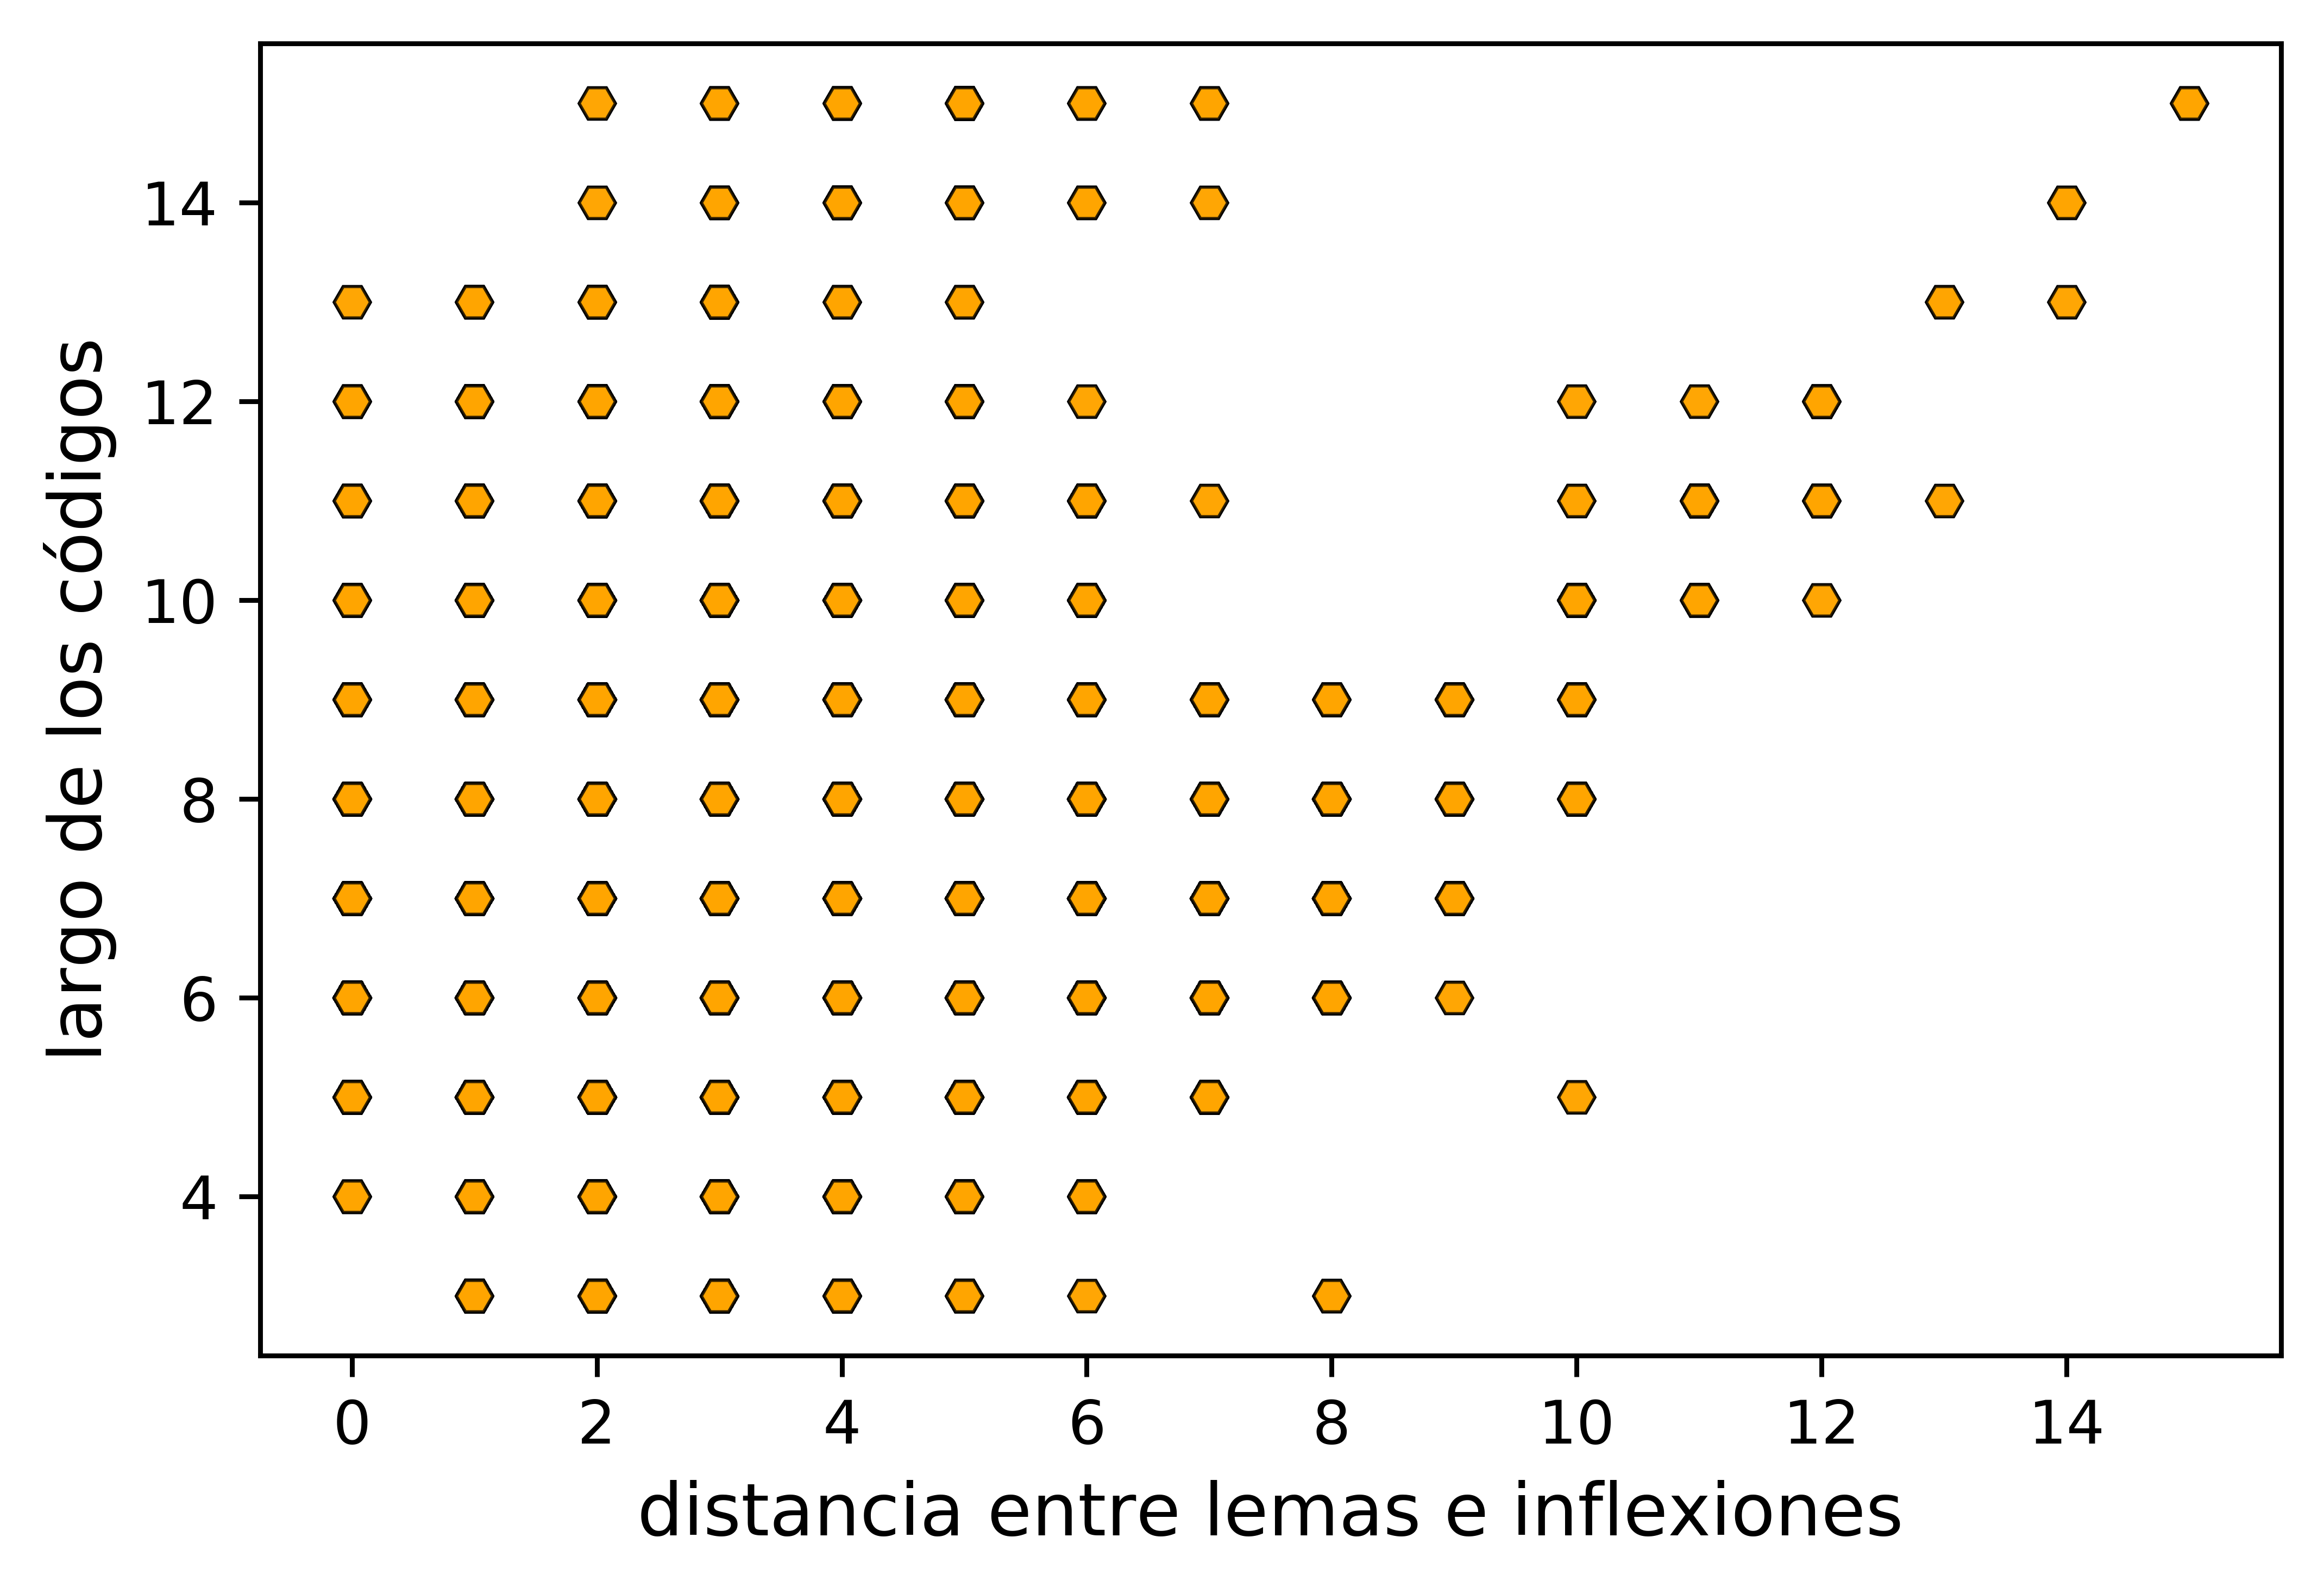

In [62]:
## ejecute el siguiente código!
## Acá graficamos lo calculado.

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
    
ax.plot(distancias,largo_codigos,linewidth=0,marker='H',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel('largo de los códigos',fontsize=12)
plt.xlabel('distancia entre lemas e inflexiones',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('distanciavslargo.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 11. Responda las siguientes preguntas. 
- ¿A partir de los cálculos realizados, qué podemos decir sobre la tipología morfológica de la lengua estudiada? Use en su respuesta algo de los cálculos realizados en relación a inflexiones y lemas. Puede explicar los calculos propuestos de manera informal.
- ¿Qué otros cálculos podrían hacerse?